<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_MuSeRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
%%capture
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/MuSeRC" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

In [2]:
%%capture
%%bash
# add tree package for fancy directory display
apt-get install tree

In [3]:
# display the content of the folder
!tree

.
└── data
    └── MuSeRC
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

2 directories, 3 files


In [252]:
import pandas as pd
import json
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 80)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""

        passages_df = []
        questions_df = pd.DataFrame(columns=['question', 'text', 
                                             'label', 'passage_id'])

        lines = self.yield_lines()

        for passage_id, line in enumerate(lines):
            passage, questions = self.split_texts_and_questions(line)
            passages_df.append(passage)
            questions = pd.json_normalize(
                questions, 'answers', 'question'
                )[['question', 'text', 'label']]

            questions['passage_id'] = passage_id
            
            questions_df = pd.concat([questions_df, questions])

        passages_df = pd.DataFrame({'passage': passages_df})
        questions_df = questions_df.rename(columns={'text': 'answer'})

        return passages_df, questions_df

    
    def yield_lines(self):
        """ yields json lines one by one """
        with open(self.path) as f:
            for line in f:
                yield json.loads(line)


    def split_texts_and_questions(self, line):
        """ transforms a complex json object into a single row dataframe"""
        text = line['passage']['text']
        questions = line['passage']['questions']

        return text, questions

# Explore Train Data

In [253]:
handler = JSONL_handler('data/MuSeRC/train.jsonl')
passages_df, questions_df = handler.to_pandas()

In [258]:
passages_df.iloc[[1]]

,passage
1,"(1)Образы природы сопровождают людей с самой глубокой древности. (2)Сцены охоты древние люди оставили нам в наследство на стенах пещер, на камнях в виде скупых царапин, изображающих лосей, кабанов, туров. (3)Нынешняя техника даёт возможность увидеть зверей и птиц в естественных красках и обстановке. (4)Мы видим эпизоды их жизни, и в душе появляется тёплое чувство. (5)Они где-то есть, эти звери, они ещё бегают, рычат, прячутся или проявляют, как и мы, люди, любопытство… (6)Желая испытать это тёплое чувство, на городских этажах мы держим кошек, собак, попугаев, белок, рыбок в аквариуме. (7)Врачи говорят, что поглаживание кошки или кормление синицы с ладони целительны для человеческой психики. (8)Заяц, встреченный в парке, исправил моё настроение. (9)А сколько случаев, когда человека с жизнью связывает только ниточка общения с собакой, с обыкновенными воробьями или воронами! (10)Бывшая работница нашей редакции время от времени по телефону докладывает мне о жизни ворон во дворе, о том, что они любят есть, как безошибочно узнают её в массе людей. (11)А старушка у нас во дворе каждое утро носит воробьям крошки. (12)И я вижу радость на лице женщины, наблюдающей, как суетливые птички подбирают рассыпанный корм. (13)Иногда мне кажется: не прилетят воробьи к её выходу из подъезда, и старушка умрёт от обрыва последней ниточки, соединяющей её с жизнью. (14)Как-то мы разговорились с ней, и она призналась, что ни разу не видела в жизни, как пролетают и кричат журавли. (15)Я рассказал ей, как журавли весною танцуют, разбившись на пары, и кричат так, что голоса их сливаются в один торжествующий звук любви. (16)Старушка слушала внимательно и, прощаясь, сказала три слова: «Какой вы счастливый…» (17)Яснополянский мудрец говорил то же самое в дневниках: «Счастье – это быть с природой, видеть её, говорить с ней». (По В.М. Пескову)"


In [259]:
questions_df[questions_df.passage_id == 1]

,question,answer,label,passage_id
0,Что ни разу в жизни не видела старушка?,Как кричат журавли.,1,1
1,Что ни разу в жизни не видела старушка?,Счастье.,0,1
2,Что ни разу в жизни не видела старушка?,Воробьев.,0,1
3,Что ни разу в жизни не видела старушка?,Как журавли пролетают.,1,1
4,Что видит автор каждое утро?,Журавлей.,0,1
5,Что видит автор каждое утро?,Радость на лице женщины.,1,1
6,Что видит автор каждое утро?,Старушка носит воробьям крошки.,1,1
7,Что видит автор каждое утро?,Зайца.,0,1
8,Какие образы древние люди оставили нам в наследство на стенах пещер?,"Сцены охоты, образы лосей, кабанов, туров.",1,1
9,Какие образы древние люди оставили нам в наследство на стенах пещер?,Нынешней техники.,0,1


In [260]:
passages_df.iloc[[13]]

,passage
13,"(1) Компания Bamford, которая занимается отделкой люксовых часов, представила три модели «полярных» Rolex. (2) Как сообщает Highsnobiety, в их основу легли Rolex Daytona, Explorer и Milgauss. (3) Все часы выполнены в белом цвете, что и дало название выпущенной ограниченным тиражом коллекции. (4) Следует отметить, что модификация часов Rolex маркой Bamford не является официальной коллаборацией: в переделку берутся модели, приобретенные частным образом в фирменных магазинах швейцарского бренда. (5) После переделки часы будут доступны в фирменных магазинах бренда Bamford. (6) Их стоимость издание не называет, но средний ценник на такие модели составляет 15-35 тысяч долларов. (7) Rolex — швейцарский производитель часов класса люкс. (8) Компания основана в 1905 году, её штаб-квартира располагается в Женеве. (9) В начале ноября Bamford совместно с Dr. Romanelli представила лимитированную коллекцию часов Rolex, посвященную моряку Попаю. (10) Корпус выполнен из титана, а роль стрелок в механизме играют руки мультипликационного персонажа. (11) Всего в линейке представлены 29 экземпляров. (12) Цена — 31,7 тысячи долларов. (13) Часы продаются в коллекционной упаковке, в комплекте к ним идет банка шпината (еда, которая придает Попаю сил) и консервный нож."


In [261]:
questions_df[questions_df.passage_id == 13]

,question,answer,label,passage_id
0,Когда основана компания швейцарского производителя часов?,Компания основана в 1905 году.,1,13
1,Когда основана компания швейцарского производителя часов?,Её основали в 60-х годах.,0,13
2,Когда основана компания швейцарского производителя часов?,В 1905 году.,1,13
3,Когда основана компания швейцарского производителя часов?,В 1990 году.,0,13
4,"Какова цена часов, которые продаются в коллекционной упаковке?",100 долларов.,0,13
5,"Какова цена часов, которые продаются в коллекционной упаковке?","Цена составляет 31,7 тысяч долларов.",1,13
6,"Какова цена часов, которые продаются в коллекционной упаковке?",Часы не продаются.,0,13
7,"Какова цена часов, которые продаются в коллекционной упаковке?","31,7 тысячи долларов.",1,13
8,Что представила компания Bamford по цене от 15 до 35 тысяч долларов?,"три модели ""полярных"" Rolex, выпущенных ограниченным тиражом"".",1,13
9,Что представила компания Bamford по цене от 15 до 35 тысяч долларов?,Ограниченный тираж люксовых часов Rolex.,1,13


In [262]:
passages_df.iloc[[27]]

,passage
27,"""(1) На проходящем в Мюнхене процессе над двумя подростками, до смерти избившими пассажира электрички, 50-летнего Доминика Бруннера, были представлены показания некоторых очевидцев, согласно которым Бруннер первым начал драку, сообщает Spiegel. (2) Двое подростков Маркус Ш. (Markus Sch.) и Себастиан Л. (Sebastian L.) вымогали деньги у группы школьников, возвращавшихся 12 сентября 2009 года домой на электричке. (3) Бруннер вступился за детей и предложил выйти с ним на платформу. (4) На остановке Бруннер позвонил машинисту поезда по внутренней связи, заявив: ""У вас тут возникли неприятности"". (5) После этого он бросился с кулаками на хулиганов и, по словам свидетелей, нанес одному из них удар в лицо. (6) По данным Spiegel, Доминик Бруннер около года брал уроки бокса, однако Маркусу Ш. и Себастиану Л. удалось его одолеть, они сбили его на землю - падая, Бруннер ударился об ограду платформы, - и продолжили бить ногами. (7) От полученных травм Бруннер скончался. (8) Инцидент вызвал громкий резонанс по всей стране. (9) Президент ФРГ Хорст Келер посмертно удостоил его одной из высших наград - Федерального креста за заслуги I степени - за проявленное гражданское мужество. (10) Маркусу Ш. и Себастиану Л. были предъявлены обвинения в убийстве. (11) Отмечается, что до этого они уже не раз задерживались за различного рода правонарушения. (12) В момент совершения преступления оба были пьяны."""


In [263]:
questions_df[questions_df.passage_id == 27]

,question,answer,label,passage_id
0,Как Доминик Бруннер вступился за школьников?,"Бруннер позвонил машинисту поезда, заявив: ""У вас тут возникли неприятности.",1,27
1,Как Доминик Бруннер вступился за школьников?,Бруннер вступился за детей.,0,27
2,Как Доминик Бруннер вступился за школьников?,"После этого он бросился с кулаками на хулиганов. "".",1,27
3,Как Доминик Бруннер вступился за школьников?,Lвое подростков Маркус Ш. и Себастиан Л. вымогали деньги у группы школьников.,0,27
4,Какой резонанс вызвало это преступление?,Маркусу Ш. и Себастиану Л. были предъявлены обвинения в убийстве.,1,27
5,Какой резонанс вызвало это преступление?,"Маркусу Ш. и Себастиану Л. удалось его одолеть, они сбили его на землю.",0,27
6,Какой резонанс вызвало это преступление?,Президент ФРГ Хорст Келер посмертно удостоил его одной из высших наград.,1,27
7,"Как звали погибшего пассажира, забитого двумя подростками?",Доминик.,1,27
8,"Как звали погибшего пассажира, забитого двумя подростками?",Маркус Ш.,0,27
9,"Как звали погибшего пассажира, забитого двумя подростками?",Доминик Бруннер.,1,27


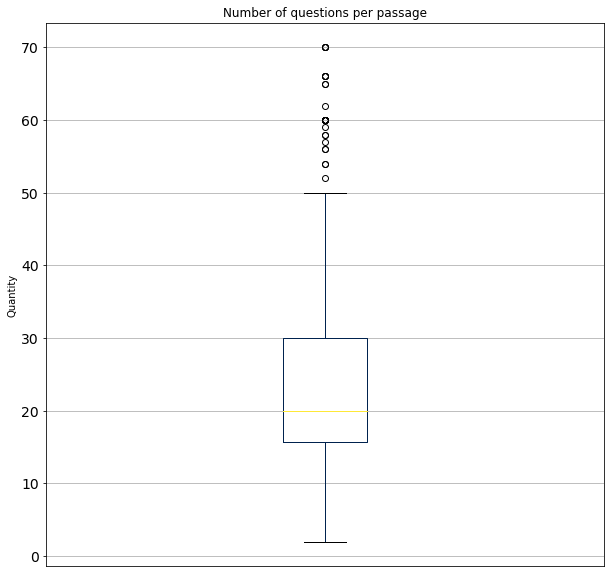

In [75]:
questions_df['passage_id'].value_counts(sort=False).plot(
    kind='box',
    figsize=(10,10),
    title='Number of questions per passage',
    grid=True,
    use_index=False,
    ylabel='Quantity',
    xticks=[],
    fontsize=14,
    colormap='cividis')

In [138]:
import matplotlib.pyplot as plt
import numpy as np

In [231]:
label_distribution =  questions_df[['passage_id', 'label']].value_counts(sort=False).to_frame()
label_distribution = label_distribution.rename(columns={0:'counter'})
label_distribution.reset_index(inplace=True)
label_distribution.head()

,passage_id,label,counter
0,0,0,25
1,0,1,16
2,1,0,14
3,1,1,12
4,2,0,13


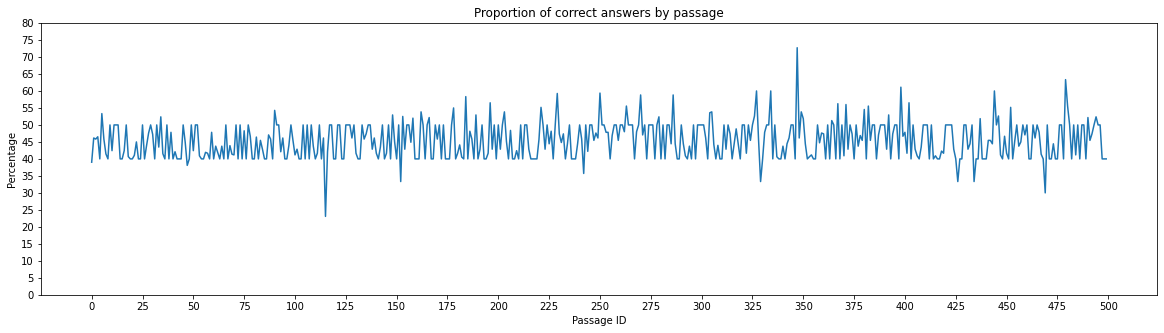

In [249]:
correct = label_distribution[label_distribution.label==1].counter.to_numpy()
incorrect = label_distribution[label_distribution.label==0].counter.to_numpy()

idxs = [i for i in range(500)]

proportion = (correct / (incorrect+correct)) * 100
plt.figure(figsize=(20, 5))
plt.plot(idxs, proportion)

plt.ylabel('Percentage')
plt.xlabel('Passage ID')
plt.title('Proportion of correct answers by passage')
plt.yticks(np.arange(0, 85, 5))
plt.xticks(np.arange(0, 501, 25))
plt.show()